# Linear Regression Error Graph

In [1]:
# Linear Regression
import matplotlib.pyplot as plt  
import numpy as np
import pandas as pd
import os
os.chdir("C://Digital Nest/Linear Regression")
print (os.getcwd())

C:\Digital Nest\Linear Regression


In [2]:
HP = pd.read_csv('House Prices.csv')
HP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
HP.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

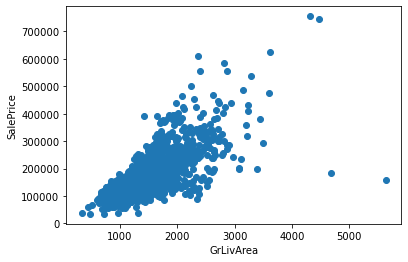

In [4]:
# plot the graph between  & Weight
plt.scatter(HP.GrLivArea, HP.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [5]:
np.corrcoef(HP.GrLivArea, HP.SalePrice)

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

In [6]:
HPX = pd.DataFrame(HP,columns=["GrLivArea"])
HPY = pd.DataFrame(HP,columns=["SalePrice"])
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
HPX2 = pd.DataFrame(MMS.fit_transform(HPX),columns=["GrLivArea"])
HPY2 = pd.DataFrame(MMS.fit_transform(HPY),columns=["SalePrice"])

In [7]:
slopes = np.arange(0.7,1.1,0.01)
print(slopes)
print(len(slopes))
error = list()
for m in slopes:
    predict = m * HPX2.GrLivArea
    error.append(np.sum((predict - HPY2.SalePrice)**2))
#print(error)

[0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1 ]
41


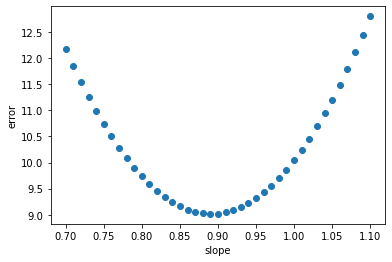

In [8]:
plt.scatter(slopes,error)
plt.xlabel("slope")
plt.ylabel("error")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
LIRE = LinearRegression(fit_intercept=False)
LIRE.fit(HPX2,HPY2.SalePrice)
print(LIRE.coef_)

[0.89100194]
